<h2><center>Week 2 - Assignment</center></h2>
<h3><center>Programming for Data Science 2025</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/17** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Annina Helmy + Markus Anwander = *HelmyAnnina_AnwanderMarkus.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For question about the lecture content or exam, contact: *annina.helmy@students.unibe.ch* with the subject: *Programming for Data Science 2025 - Lecture XY*.
For questions about the excercise/grading of excercises, contact: *thea.waldleben@students.unibe.ch* or *patricia.gribi@students.unibe.ch* with the subject: *Programming for Data Science 2025 - Excercise XY*.
**Deadline: 14:00, March 6, 2025.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

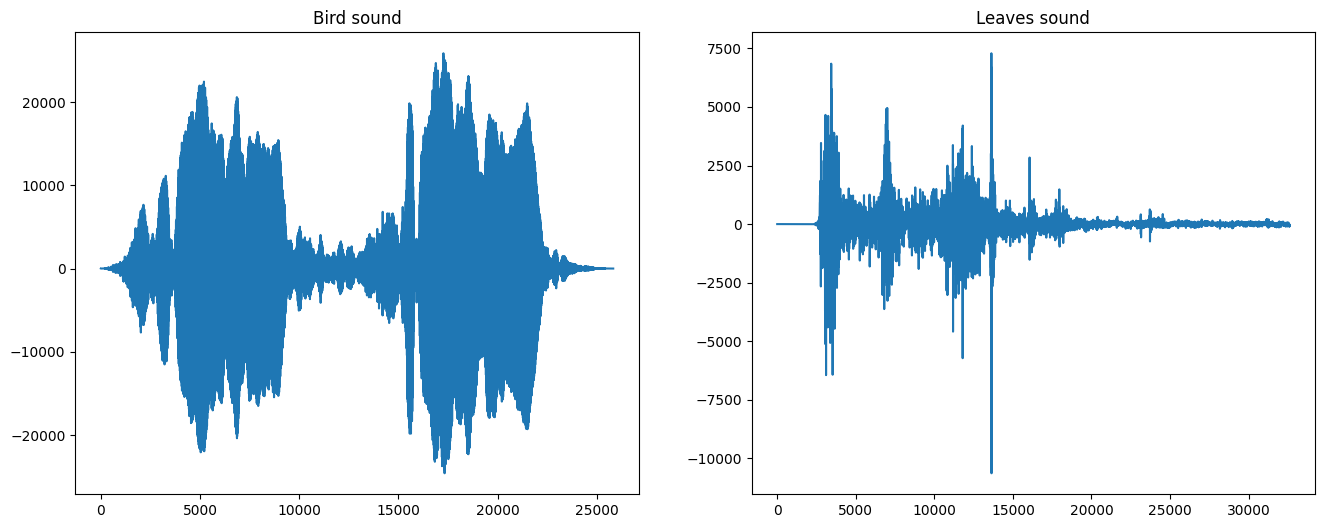

In [3]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import read

fs_bird, sound_bird = read('./data/bird.wav') #fs_bird is the sample frequency, sound_bird is actual audio data 
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###

3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###

4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

In [ ]:
###
# YOUR CODE GOES HERE
###

<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

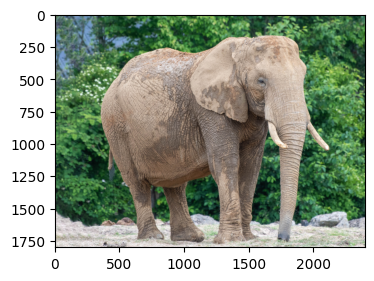

In [21]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread('./data/elephant.jpg')
im = np.array(im) #convert data into numpay array

plt.figure(figsize=(4, 4)) #4 by 4 image 
plt.imshow(im) #creates an image plot, but does not display it... loads image im into the figure.
plt.show() #renders and displays the image

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels from the 750th to the 770th row **and** from the 1000th to the 1020th column to green, and displays the resulting image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**Note**
- From the 750th row, up to and including the 770th; From the 1000th column, up to and including the 1020th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

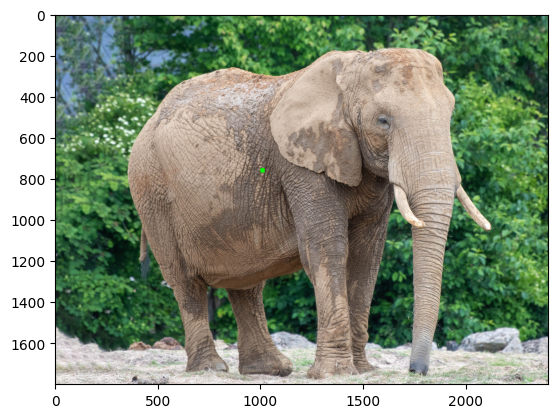

(1800, 2400, 3)


In [147]:
###
im_modified = np.array(im, dtype= np.uint8) #convert data into numpay array, with data type set to 8-bit integer
im_modified[750:771, 1000:1021] = [0, 255, 0] #set 750-770 row and 1000-1020 col to green.

plt.imshow(im_modified) #image plot
plt.show() #renders and displays the image 

print(np.shape(im_modified))
###

2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method (if you don't know the method, have a look here: https://numpy.org/doc/stable/reference/routines.array-manipulation.html )  , and plot the result. (*1 point*)

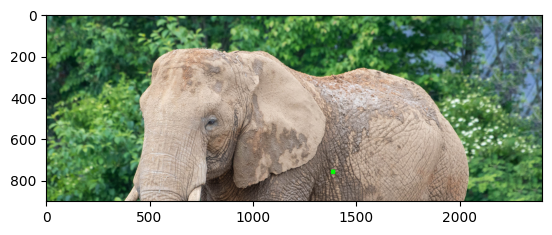

In [73]:
###
#get length of top half of image
half_len_y_axis = int(np.size(im_modified, 0)/2)

#make a copy of top half of the image
top_half = im_modified[ :half_len_y_axis+1, :].copy()

#filp image along the 2nd axis
top_half_fliped = np.flip(top_half, axis=1)
plt.imshow(top_half_fliped) #image plot
plt.show()

###

3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

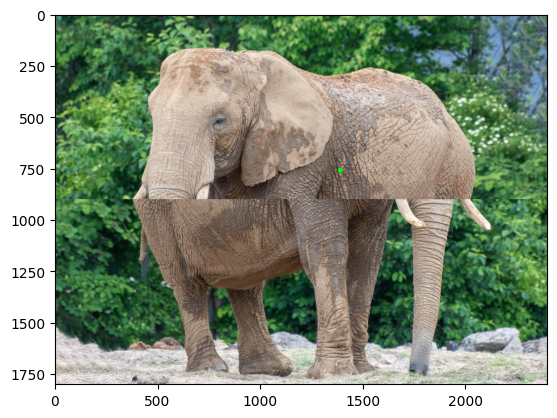

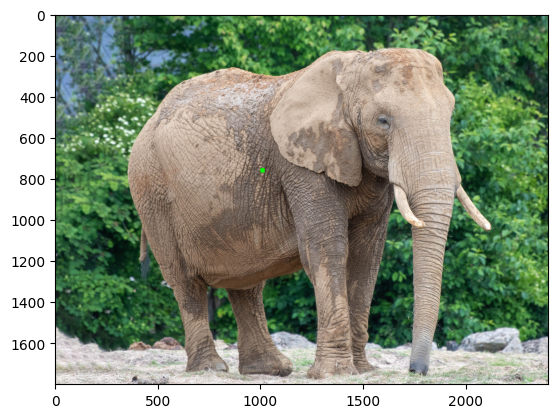

In [85]:
###

#make a copy of the bottom half of the image 
bottom_half = im_modified[half_len_y_axis:, :].copy()

#combine both images togther
im_stacked = np.vstack((top_half_fliped, bottom_half))

plt.imshow(im_stacked) #modified image
plt.show()

plt.imshow(im_modified) #original image
plt.show()

###

4. Make a shallow copy (view) of your image.
Task: Convert Image to Greyscale and change every black Pixel to Red.
- Convert to Greyscale using the luminosity method: $\text{gray} = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B$
- Change Dark Pixels to Red:
    - Identify the dark pixels and change them to [255, 0, 0] (Red) in the RGB Image.
    - dark pixels should be pixels with a greyscale value below 30

Hint:
1. You need to convert greyscale back to RGB to change the color of the black pixels.
2. You need to set a threshold to identify the dark pixels.

(1801, 2400, 3)


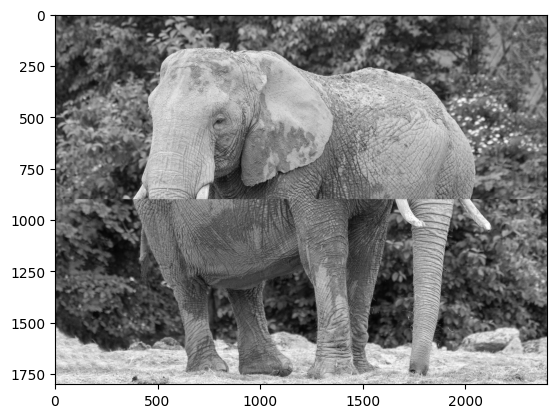

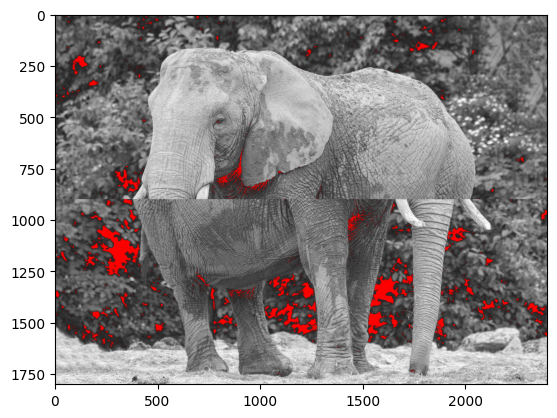

In [153]:
###
#create shallow copy of image
im_greyscale = np.array(im_stacked, dtype = np.uint8)

im_greyscale = (im_greyscale[:, :, 0] * 0.2989 + 
                im_greyscale[:, :, 1] * 0.5870 + 
                im_greyscale[:, :, 2]* 0.1140)

#convert greyscale to RGB (2d to 3d), by adding a 3rd dimension. 
im_greyscale_3d = np.expand_dims(im_greyscale, axis=-1)
im_greyscale_3d = np.repeat(im_greyscale_3d, repeats=3, axis=-1).astype(np.uint8) #set the axis to take three values 
print(np.shape(im_greyscale_3d))

#Set dark pixel threshold
dark_pixel = im_greyscale < 30

#set dark pixels to red 
im_greyscale_3d[dark_pixel] = [255, 0, 0]

plt.imshow(im_greyscale, cmap="gray") #Need to specifiy cmap as the default is viridis. 
plt.show()                                                  

plt.imshow(im_greyscale_3d)
plt.show()
###

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset. The second dimension refer to the country.

In [ ]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)
print(precip.shape) # 12 months, 4 countries

1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the four countries for each month. (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###

2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [ ]:
###
# YOUR CODE GOES HERE
###

<h3 style="text-align:left;">Exercise 4 - On Paper <span style="float: right">2 points</span></h3>

You are given a numpy array:



The array represents sales (in CHF) per day. The rows represent the item, the columns the day.
Meaning on Monday, item 1 has had a revenue of 120.-
Compute the following:
1. Write a single NumPy command to compute the total sales for all days and all products.
2. Compute the total sales for each product category.
3. Suppose a discount was applied to days, where sales exceeded $100.-$. Write a NumPy expression to return a boolean array indicating which sales values qualify for the discount.
4. The discount was set to be 15%. Adapt the sales according to this discount.

1. np.sum(name_of_array)
2. np.sum(name_of_array, axis = 1)
3. boolean_array = name_of_array > 100
4. name_of_array[boolean_array] = name_of_array[boolean_array] - (name_of_array[boolean_array] *0.15)

![Alt text](image.png)